In [1]:
import numpy as np

#Create fake income/age clusters for N people in k clusters
def createClusteredData(N, k):
    pointsPerCluster = float(N)/k
    X = []
    y = []
    for i in range (k):
        incomeCentroid = np.random.uniform(20000.0, 200000.0)
        ageCentroid = np.random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([np.random.normal(incomeCentroid, 10000.0), np.random.normal(ageCentroid, 2.0)])
            y.append(i)
    X = np.array(X)
    y = np.array(y)
    return X, y

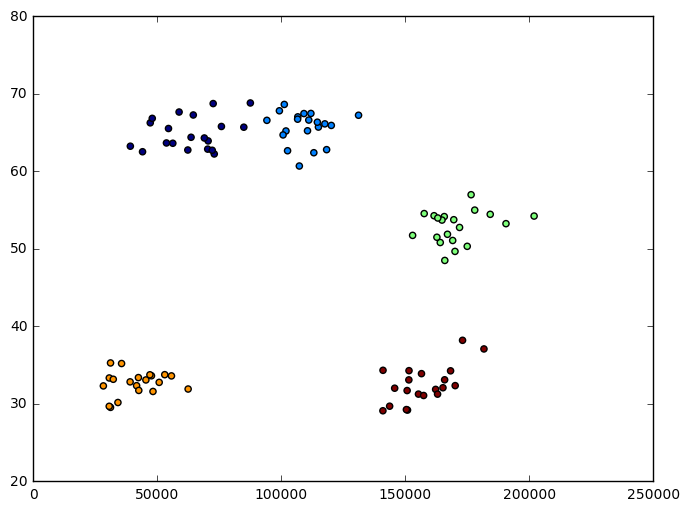

In [5]:
%matplotlib inline
from pylab import *

X,y=createClusteredData(100,5)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=y.astype(np.float))
plt.show()

In [6]:
from sklearn.svm import SVC
from sklearn import datasets

C=1.0    #select default Penalty parameter
svc=SVC(kernel='linear',C=C).fit(X,y)

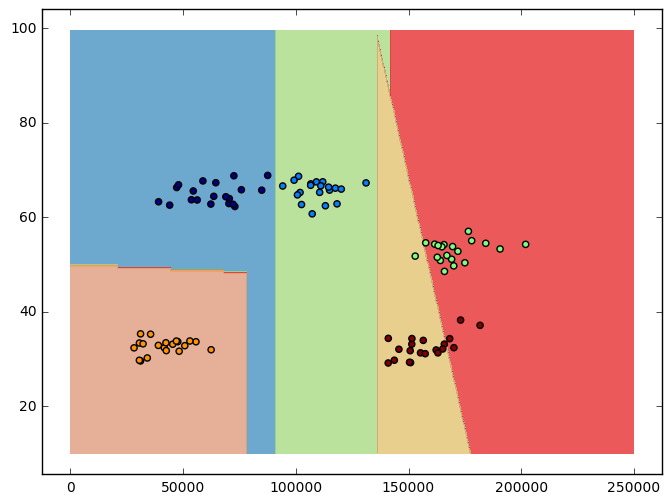

In [7]:
def plotPredictions(clf):
    xx,yy=np.meshgrid(np.arange(0,250000,10),np.arange(10,100,0.5))
    z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    
    plt.figure(figsize=(8,6))
    z=z.reshape(xx.shape)
    plt.contourf(xx,yy,z,cmap=plt.cm.Paired,alpha=0.8)
    plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
    plt.show()
    
plotPredictions(svc)

In [8]:
svc.predict([[200000, 40]])

array([2])